In [2]:
from collections import Counter
from tqdm import tqdm
import os
from os import path
import sys
import numpy as np
import nltk
from embeddings2 import GloveMatrix, TextEmbedder
import pickle
import matplotlib.pyplot as plt
from scipy import stats
from tqdm import tnrange, tqdm_notebook
import json

In [3]:
nltk.download('punkt');

[nltk_data] Downloading package punkt to /homes/rgc35/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
gm = GloveMatrix()
te = TextEmbedder(gm)

Loading embedding matrix
Done


## Sentence Length Statistics

In [5]:
# This cell loads the book corpus into memory
# It needs to be run in order for the further cells to work

book_path = "/homes/rgc35/Desktop/neural-statistician/SentEval/bookcorpus/out_txts"

file_sentence= []
tokenized_books = {}

for filename in tqdm_notebook(os.listdir(book_path)):
    
    _filename = path.join(book_path, filename)
    with open(_filename, mode='r') as book:

        sentences = nltk.tokenize.sent_tokenize(book.read())
        
        tokenized_books[filename] = [ None ] * len(sentences)
        stats = [ None ] * len(sentences)
        
        for i, sentence in enumerate(sentences):
            sentence = nltk.word_tokenize(sentence)
            if len(sentence) > 100: continue
            stats[i] = len(sentence)
            tokenized_books[filename][i] = sentence
        
        file_sentence += stats        

100%|██████████| 15592/15592 [6:09:12<00:00,  1.10s/it]   


In [32]:
with open('tokenized_books.json', 'w') as fp:
    json.dump(tokenized_books, fp)

66125529
65999378
Done flattening 
Done mean and max
max_sent_length:100, mean_sent_length:17.822523706208262, mode_sent_length:15.0


(array([19717370., 25240681., 12888202.,  4930634.,  1833515.,   755020.,
          331401.,   162750.,    88801.,    51004.]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <a list of 10 Patch objects>)

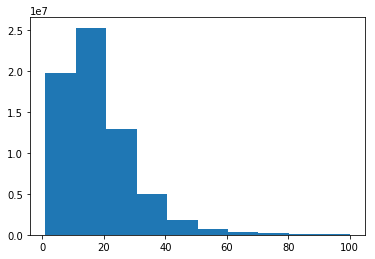

In [13]:
# Some sentence length statistics
file_sentence = list(filter(lambda x: x is not None, file_sentence))

max_sent_length = np.max(file_sentence)
mean_sent_length = np.mean(file_sentence)
print("Done mean and max")
med_sent_length = np.median(file_sentence)

print(f"max_sent_length:{max_sent_length}, mean_sent_length:{mean_sent_length}, mode_sent_length:{med_sent_length}")

plt.hist(file_sentence)

# Pickle Embeddings (Padding to max sent_len)

In [38]:
# Requires cell 4 in this notebook to be run once:
with open('tokenized_books.json', 'r') as fp:
    tokenized_books = json.load(fp)

In [31]:
max_sent_length = 70
data_path = "/homes/rgc35/Desktop/neural-statistician/SentEval/data/bookdata"
book_path = "/homes/rgc35/Desktop/neural-statistician/SentEval/bookcorpus/out_txts"

for j, (book_name, sentences) in enumerate(tqdm_notebook(tokenized_books.items())):
    
    if os.isfile(path.join(data_path, str(j) + ".pkl")): continue

    result = np.zeros((len(sentences), max_sent_length, 300))
    for i, sentence in enumerate(sentences):
        if sentence is None: continue
        em_sent = te.get_sentence_embedding(sentence, sent_length=max_sent_length)
        result[i,:,:] = em_sent

    with open(path.join(data_path, str(j) + ".pkl"), "wb") as out_file:
        pickle.dump(result, out_file)

KeyboardInterrupt: 

In [37]:
sum(list(map(len, list(tokenized_books.values())[:181])))

756261